<a href="https://colab.research.google.com/github/Rishishah2003/Football-Predictive-Analysis/blob/main/Football_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import ipywidgets as widgets
import plotly.graph_objects as go

In [ ]:
def scrape(url):
  page=requests.get(url)
  soup=BeautifulSoup(page.text,'lxml')
  #scraping the table
  table=soup.find('table',{'id':'results{}91_overall'.format(url[29:38])})
  header=[]
  #getting the column names of the table
  for i in table.find_all('th'):
    title=i.text.strip()
    header.append(title)
  header=header[:19]
  #creating a dataframe with the scraped column names
  df=pd.DataFrame(columns=header)
  #getting the data of the table and adding it to the dataframe
  for row in table.find_all('tr')[1:]:
    data=row.find_all('td')
    row_data1=[len(df)+1]
    row_data2=[td.text.strip() for td in data]
    row_data=row_data1+row_data2
    print(row_data)
    df.loc[len(df)]=row_data
  return df
df=scrape("https://fbref.com/en/comps/9/2021-2022/2021-2022-Premier-League-Stats")

[1, 'Manchester City', '38', '29', '6', '3', '99', '26', '+73', '93', '2.45', '88.7', '24.6', '+64.0', '+1.68', '52,774', 'Kevin De Bruyne - 15', 'Ederson', '→ Champions League via league finish']
[2, 'Liverpool', '38', '28', '8', '2', '94', '26', '+68', '92', '2.42', '88.7', '33.8', '+54.9', '+1.45', '53,352', 'Mohamed Salah - 23', 'Alisson', '→ Champions League via league finish']
[3, 'Chelsea', '38', '21', '11', '6', '76', '33', '+43', '74', '1.95', '63.4', '33.2', '+30.1', '+0.79', '36,443', 'Mason Mount - 11', 'Edouard Mendy', '→ Champions League via league finish']
[4, 'Tottenham', '38', '22', '5', '11', '69', '40', '+29', '71', '1.87', '61.2', '39.3', '+21.9', '+0.58', '56,523', 'Son Heung-min - 23', 'Hugo Lloris', '→ Champions League via league finish']
[5, 'Arsenal', '38', '22', '3', '13', '61', '48', '+13', '69', '1.82', '60.5', '45.7', '+14.9', '+0.39', '59,665', 'Bukayo Saka - 11', 'Aaron Ramsdale', '→ Europa League via league finish']
[6, 'Manchester Utd', '38', '16', '10'

In [ ]:
df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,29,6,3,99,26,+73,93,2.45,88.7,24.6,+64.0,+1.68,"52,774",Kevin De Bruyne - 15,Ederson,→ Champions League via league finish
1,2,Liverpool,38,28,8,2,94,26,+68,92,2.42,88.7,33.8,+54.9,+1.45,"53,352",Mohamed Salah - 23,Alisson,→ Champions League via league finish
2,3,Chelsea,38,21,11,6,76,33,+43,74,1.95,63.4,33.2,+30.1,+0.79,"36,443",Mason Mount - 11,Edouard Mendy,→ Champions League via league finish
3,4,Tottenham,38,22,5,11,69,40,+29,71,1.87,61.2,39.3,+21.9,+0.58,"56,523",Son Heung-min - 23,Hugo Lloris,→ Champions League via league finish
4,5,Arsenal,38,22,3,13,61,48,+13,69,1.82,60.5,45.7,+14.9,+0.39,"59,665",Bukayo Saka - 11,Aaron Ramsdale,→ Europa League via league finish
5,6,Manchester Utd,38,16,10,12,57,57,0,58,1.53,55.8,53.0,+2.8,+0.07,"73,150",Cristiano Ronaldo - 18,David de Gea,→ Europa League via league finish
6,7,West Ham,38,16,8,14,60,51,+9,56,1.47,51.4,53.5,-2.1,-0.06,"58,370",Jarrod Bowen - 12,Łukasz Fabiański,→ Europa Conference League via league finish
7,8,Leicester City,38,14,10,14,62,59,+3,52,1.37,47.8,59.3,-11.5,-0.30,"32,493",Jamie Vardy - 15,Kasper Schmeichel,
8,9,Brighton,38,12,15,11,42,44,-2,51,1.34,46.2,42.9,+3.3,+0.09,"30,966","Leandro Trossard, Neal Maupay - 8",Robert Sánchez,
9,10,Wolves,38,15,6,17,38,43,-5,51,1.34,37.5,56.9,-19.4,-0.51,"30,841",Raúl Jiménez - 6,José Sá,


In [ ]:
df[df.columns] = df[df.columns].apply(pd.to_numeric,errors='ignore')
df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64.0,1.68,"52,774",Kevin De Bruyne - 15,Ederson,→ Champions League via league finish
1,2,Liverpool,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45,"53,352",Mohamed Salah - 23,Alisson,→ Champions League via league finish
2,3,Chelsea,38,21,11,6,76,33,43,74,1.95,63.4,33.2,30.1,0.79,"36,443",Mason Mount - 11,Edouard Mendy,→ Champions League via league finish
3,4,Tottenham,38,22,5,11,69,40,29,71,1.87,61.2,39.3,21.9,0.58,"56,523",Son Heung-min - 23,Hugo Lloris,→ Champions League via league finish
4,5,Arsenal,38,22,3,13,61,48,13,69,1.82,60.5,45.7,14.9,0.39,"59,665",Bukayo Saka - 11,Aaron Ramsdale,→ Europa League via league finish
5,6,Manchester Utd,38,16,10,12,57,57,0,58,1.53,55.8,53.0,2.8,0.07,"73,150",Cristiano Ronaldo - 18,David de Gea,→ Europa League via league finish
6,7,West Ham,38,16,8,14,60,51,9,56,1.47,51.4,53.5,-2.1,-0.06,"58,370",Jarrod Bowen - 12,Łukasz Fabiański,→ Europa Conference League via league finish
7,8,Leicester City,38,14,10,14,62,59,3,52,1.37,47.8,59.3,-11.5,-0.30,"32,493",Jamie Vardy - 15,Kasper Schmeichel,
8,9,Brighton,38,12,15,11,42,44,-2,51,1.34,46.2,42.9,3.3,0.09,"30,966","Leandro Trossard, Neal Maupay - 8",Robert Sánchez,
9,10,Wolves,38,15,6,17,38,43,-5,51,1.34,37.5,56.9,-19.4,-0.51,"30,841",Raúl Jiménez - 6,José Sá,


In [ ]:
url="https://fbref.com/en/comps/9/{0}/{0}-Premier-League-Stats"

df202122=scrape(url.format("2021-2022"))
df202021=scrape(url.format("2020-2021"))
df201920=scrape(url.format("2019-2020"))
df201819=scrape(url.format("2018-2019"))

[1, 'Manchester City', '38', '29', '6', '3', '99', '26', '+73', '93', '2.45', '88.7', '24.6', '+64.0', '+1.68', '52,774', 'Kevin De Bruyne - 15', 'Ederson', '→ Champions League via league finish']
[2, 'Liverpool', '38', '28', '8', '2', '94', '26', '+68', '92', '2.42', '88.7', '33.8', '+54.9', '+1.45', '53,352', 'Mohamed Salah - 23', 'Alisson', '→ Champions League via league finish']
[3, 'Chelsea', '38', '21', '11', '6', '76', '33', '+43', '74', '1.95', '63.4', '33.2', '+30.1', '+0.79', '36,443', 'Mason Mount - 11', 'Edouard Mendy', '→ Champions League via league finish']
[4, 'Tottenham', '38', '22', '5', '11', '69', '40', '+29', '71', '1.87', '61.2', '39.3', '+21.9', '+0.58', '56,523', 'Son Heung-min - 23', 'Hugo Lloris', '→ Champions League via league finish']
[5, 'Arsenal', '38', '22', '3', '13', '61', '48', '+13', '69', '1.82', '60.5', '45.7', '+14.9', '+0.39', '59,665', 'Bukayo Saka - 11', 'Aaron Ramsdale', '→ Europa League via league finish']
[6, 'Manchester Utd', '38', '16', '10'

In [ ]:
df1=df202122.copy()
df1=df1.append(df202021)
df1=df1.append(df201920)
df1=df1.append(df201819)

<ipython-input-6-805d8c24d630>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df202021)
<ipython-input-6-805d8c24d630>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df201920)
<ipython-input-6-805d8c24d630>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df201819)


In [ ]:
df1

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,29,6,3,99,26,+73,93,2.45,88.7,24.6,+64.0,+1.68,"52,774",Kevin De Bruyne - 15,Ederson,→ Champions League via league finish
1,2,Liverpool,38,28,8,2,94,26,+68,92,2.42,88.7,33.8,+54.9,+1.45,"53,352",Mohamed Salah - 23,Alisson,→ Champions League via league finish
2,3,Chelsea,38,21,11,6,76,33,+43,74,1.95,63.4,33.2,+30.1,+0.79,"36,443",Mason Mount - 11,Edouard Mendy,→ Champions League via league finish
3,4,Tottenham,38,22,5,11,69,40,+29,71,1.87,61.2,39.3,+21.9,+0.58,"56,523",Son Heung-min - 23,Hugo Lloris,→ Champions League via league finish
4,5,Arsenal,38,22,3,13,61,48,+13,69,1.82,60.5,45.7,+14.9,+0.39,"59,665",Bukayo Saka - 11,Aaron Ramsdale,→ Europa League via league finish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,Southampton,38,9,12,17,45,65,-20,39,1.03,46.9,55.1,-8.2,-0.22,"30,139","Danny Ings, James Ward-Prowse - 7",Alex McCarthy,
16,17,Brighton,38,9,9,20,35,60,-25,36,0.95,35.3,59.1,-23.8,-0.63,"30,426",Glenn Murray - 13,Mathew Ryan,
17,18,Cardiff City,38,10,4,24,34,69,-35,34,0.89,42.4,61.5,-19.1,-0.50,"31,408","Bobby Reid, Víctor Camarasa - 5",Neil Etheridge,Relegated
18,19,Fulham,38,7,5,26,34,81,-47,26,0.68,41.3,68.2,-26.8,-0.71,"24,371",Aleksandar Mitrović - 11,Sergio Rico,Relegated


In [ ]:
df1[df1.columns] = df1[df1.columns].apply(pd.to_numeric,errors='ignore')
df1

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64.0,1.68,"52,774",Kevin De Bruyne - 15,Ederson,→ Champions League via league finish
1,2,Liverpool,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45,"53,352",Mohamed Salah - 23,Alisson,→ Champions League via league finish
2,3,Chelsea,38,21,11,6,76,33,43,74,1.95,63.4,33.2,30.1,0.79,"36,443",Mason Mount - 11,Edouard Mendy,→ Champions League via league finish
3,4,Tottenham,38,22,5,11,69,40,29,71,1.87,61.2,39.3,21.9,0.58,"56,523",Son Heung-min - 23,Hugo Lloris,→ Champions League via league finish
4,5,Arsenal,38,22,3,13,61,48,13,69,1.82,60.5,45.7,14.9,0.39,"59,665",Bukayo Saka - 11,Aaron Ramsdale,→ Europa League via league finish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,Southampton,38,9,12,17,45,65,-20,39,1.03,46.9,55.1,-8.2,-0.22,"30,139","Danny Ings, James Ward-Prowse - 7",Alex McCarthy,
16,17,Brighton,38,9,9,20,35,60,-25,36,0.95,35.3,59.1,-23.8,-0.63,"30,426",Glenn Murray - 13,Mathew Ryan,
17,18,Cardiff City,38,10,4,24,34,69,-35,34,0.89,42.4,61.5,-19.1,-0.50,"31,408","Bobby Reid, Víctor Camarasa - 5",Neil Etheridge,Relegated
18,19,Fulham,38,7,5,26,34,81,-47,26,0.68,41.3,68.2,-26.8,-0.71,"24,371",Aleksandar Mitrović - 11,Sergio Rico,Relegated


<Axes: xlabel='xGD', ylabel='Pts'>

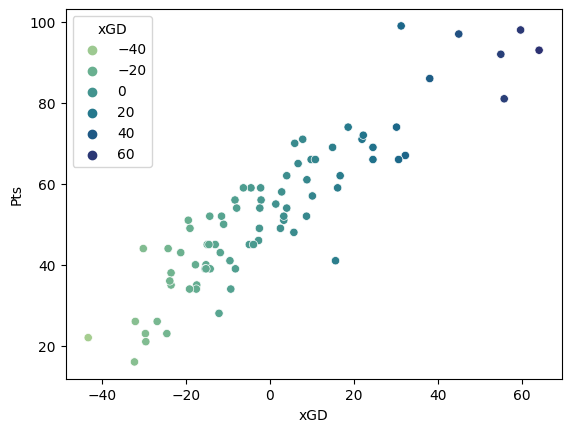

In [ ]:
sns.scatterplot(data=df1,x="xGD",y="Pts",hue="xGD",palette="crest")

<Axes: xlabel='xG', ylabel='Pts'>

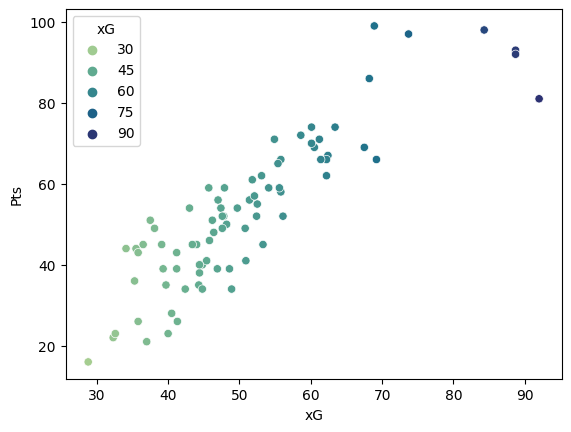

In [ ]:
sns.scatterplot(data=df1,x="xG",y="Pts",hue="xG",palette="crest")

In [ ]:
df1['Pts'].corr(df1['xGD']) > df1['Pts'].corr(df1['xG'])

True

In [ ]:
x=df1['xGD']
y=df1['Pts']
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=101)

In [ ]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lm.coef_)

[[0.66626097]]


Text(0.5, 1.0, 'Expected Goal Difference vs Points ')

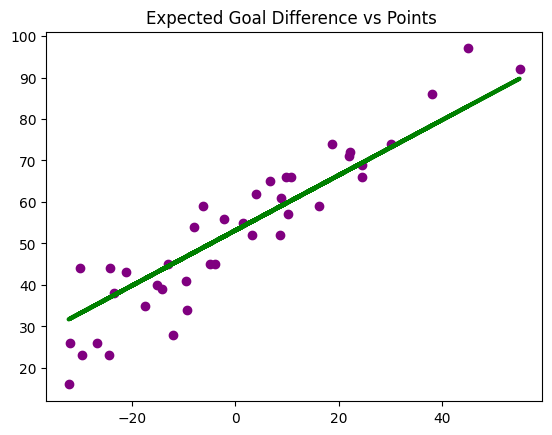

In [ ]:
predictions = lm.predict(x_test)

plt.scatter(x_test, y_test,  color='purple')
plt.plot(x_test, predictions, color='green', linewidth=3)
plt.title("Expected Goal Difference vs Points ")

In [ ]:
lm.score(x,y)

0.8110378667994851

In [ ]:
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df_pred

,Actual,Predicted
0,72,67.934331
1,43,39.018605
2,44,37.019822
3,45,49.878659
4,69,69.466731
5,65,57.607286
6,74,65.535792
7,45,44.481945
8,62,55.808381
9,86,78.461254


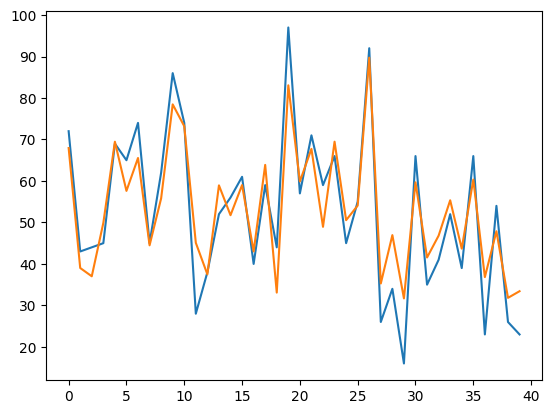

In [ ]:
plt.plot(df_pred['Actual'])
plt.plot(df_pred['Predicted'])

In [ ]:
#@title Creating team comparison visualizations: Select the season
seasonlist = ['2021-22','2020-21','2019-20',
              '2018-19']
seasons = widgets.Dropdown(
      options=seasonlist,
      value='2021-22',
      rows=5,
      description='Choose Season',
      layout={'width':'max-content'},
      style={'description_width': 'initial'},
      disabled=False
  )
seasons

Dropdown(description='Choose Season', layout=Layout(width='max-content'), options=('2021-22', '2020-21', '2019…

In [ ]:
#@title Select the team
seasonchoose = {'2021-22':df202122,
                '2020-21':df202021,
                '2019-20':df201920,
                '2018-19':df201819}
seasondf1=seasonchoose[seasons.value].copy()
teamlist=[]
for i in seasondf1['Squad']:
  teamlist.append(i)
teams1 = widgets.Dropdown(
      options=teamlist,
      value=teamlist[0],
      rows=20,
      description='Choose Team',
      layout={'width':'max-content'},
      style={'description_width': 'initial'},
      disabled=False
  )
teams1

Dropdown(description='Choose Team', layout=Layout(width='max-content'), options=('Manchester City', 'Liverpool…

In [ ]:
#@title Select the season
seasonlist = ['2021-22','2020-21','2019-20',
              '2018-19']
seasons2 = widgets.Dropdown(
      options=seasonlist,
      value='2021-22',
      rows=5,
      description='Choose Season',
      layout={'width':'max-content'},
      style={'description_width': 'initial'},
      disabled=False
  )
seasons2

Dropdown(description='Choose Season', layout=Layout(width='max-content'), options=('2021-22', '2020-21', '2019…

In [ ]:
#@title   Select the team
seasonchoose = {'2021-22':df202122,
                '2020-21':df202021,
                '2019-20':df201920,
                '2018-19':df201819}
seasondf2=seasonchoose[seasons2.value].copy()
teamlist=[]
for i in seasondf2['Squad']:
  teamlist.append(i)
teams2 = widgets.Dropdown(
      options=teamlist,
      value=teamlist[0],
      rows=20,
      description='Choose Team',
      layout={'width':'max-content'},
      style={'description_width': 'initial'},
      disabled=False
  )
teams2

Dropdown(description='Choose Team', layout=Layout(width='max-content'), options=('Manchester City', 'Liverpool…

In [ ]:
season1_data=[]
season2_data=[]
for index, rows in seasondf1.iterrows():
    my_list =[rows.Squad,rows.W, rows.D, rows.L,rows.GF,rows.xG,rows.GA,rows.xGA,rows.GD,rows.xGD,rows.Pts]
    season1_data.append(my_list)
for i in range(0,len(season1_data)-1):
  if teams1.value==season1_data[i][0]:
    season1_data=season1_data[i]
    break
season1_data=season1_data[1:]
for i in range(len(season1_data)):
  season1_data[i]=float(season1_data[i])


for index, rows in seasondf2.iterrows():
    my_list =[rows.Squad,rows.W, rows.D, rows.L,rows.GF,rows.xG,rows.GA,rows.xGA,rows.GD,rows.xGD,rows.Pts]
    season2_data.append(my_list)
for i in range(0,len(season2_data)-1):
  if teams2.value==season2_data[i][0]:
    season2_data=season2_data[i]
    break
season2_data=season2_data[1:]
for i in range(len(season2_data)):
  season2_data[i]=float(season2_data[i])

In [ ]:
categories = ['Wins','Draws','Losses','Goals','Expected goals','Goals against','Expected goals against',
              'Goal difference','Expected goal difference','Points']
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=season1_data,
      theta=categories,
      fill="toself",
      name=teams1.value,
      fillcolor="#fe9929", 
      opacity=0.6, 
      line=dict(color="#fe9929")))
fig.add_trace(go.Scatterpolar(
      r=season2_data,
      theta=categories,
      fill='toself',
      name=teams2.value,
      fillcolor="#238443", 
      opacity=0.6, 
      line=dict(color="#238443")))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      color='white',
      range=[min(season1_data+season2_data),max(season1_data+season2_data)])),
  showlegend=False,
  paper_bgcolor="#000000",
  font=dict(color='white'))
fig.update_polars(dict(bgcolor="#525252"))
fig.add_annotation(x=0, y=1.25,
            text=teams1.value,
            showarrow=False,
            font_color='#fe9929',
            font_size=40
           )
fig.add_annotation(x=0, y=1.1,
            text=seasons.value,
            showarrow=False,
            font_color='#fe9929',
            font_size=20
           )
fig.add_annotation(x=1, y=1.25,
            text=teams2.value,
            showarrow=False,
            font_color='#238443',
            font_size=40
           )
fig.add_annotation(x=1, y=1.1,
            text=seasons2.value,
            showarrow=False,
            font_color='#238443',
            font_size=20
           )
fig.add_annotation(x=0.5, y=-0.17,
            text="Premier League Team Comparison",
            showarrow=False,
            font_color='#ae017e',
            font_size=30
           )
fig.show()